In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("output/04A.pair_annotation/results_significant_annotated_categories.csv")
df = df.sort_values("pval_beta_i_on_j")
print("number of hits", len(df))
df = df.query("annotation=='known_AB_second'")
print("number of unique first mutations",len( df.position_j.unique()))
print("number of times AB evolves second", len(df))
df.to_csv("output/05.antibiotic/potentiators_significant.csv")

number of hits 25947
number of unique first mutations 438
number of times AB evolves second 2162


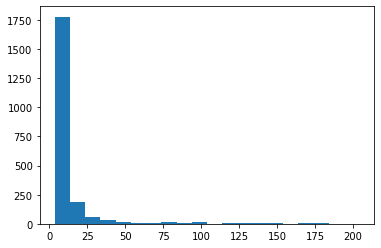

In [8]:
## is there a natural cutoff for top p-values? 
plt.hist(df.log_pval, 20)
plt.show()

In [9]:
# not really

In [11]:
# Observation: some mutations j seem to potentiate a lot of downstream mutations i
# construct a matrix of all pairs i,j to examine which j's lead to a lot of i's
subdf = df
positions_i = list(sorted(subdf.position_i.unique()))
positions_j = list(sorted(subdf.position_j.unique()))

mat = np.zeros(shape=(len(positions_i), len(positions_j)))

for idx, row in subdf.iterrows():
    idx_i = positions_i.index(row.position_i)
    idx_j = positions_j.index(row.position_j)
    mat[idx_i, idx_j] = 1


<AxesSubplot:>

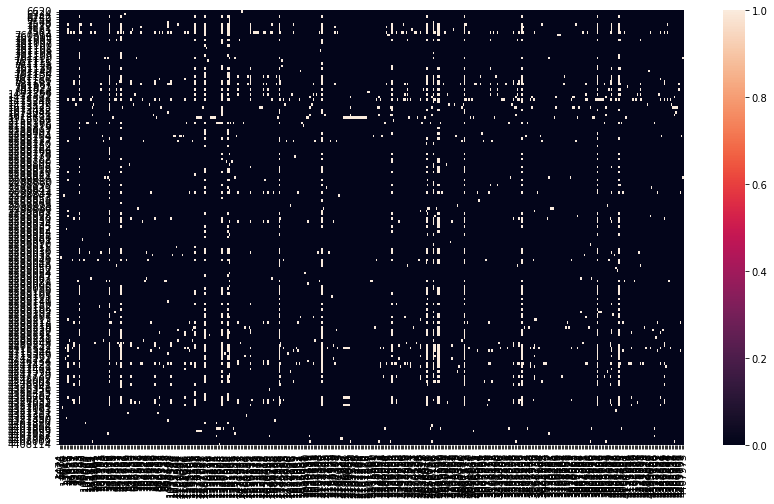

In [12]:
figure = plt.figure(figsize=(14,8))
ax = figure.gca()

sns.heatmap(mat, yticklabels = positions_i, xticklabels=positions_j)

### how often does each gene appear as a potentiator?


(array([394.,  21.,   1.,   2.,   0.,   1.,   2.,   1.,   9.,   7.]),
 array([ 1.,  8., 15., 22., 29., 36., 43., 50., 57., 64., 71.]),
 <BarContainer object of 10 artists>)

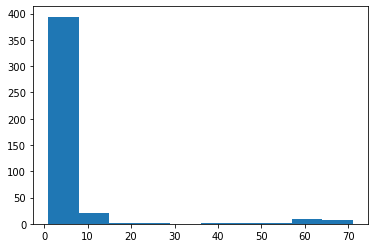

In [13]:
plt.hist(df.groupby("position_j").size())
plt.show()

In [16]:
# Recalculate matrix containing only potentiators that appear 30 or more times
newmat = mat[:,mat.sum(axis=0) > 30]
positions_j_new = np.array(positions_j)[mat.sum(axis=0) > 30]

newmat2 = newmat[newmat.sum(axis=1) > 3,:]
positions_i_new = np.array(positions_i)[newmat.sum(axis=1) > 1]

<AxesSubplot:>

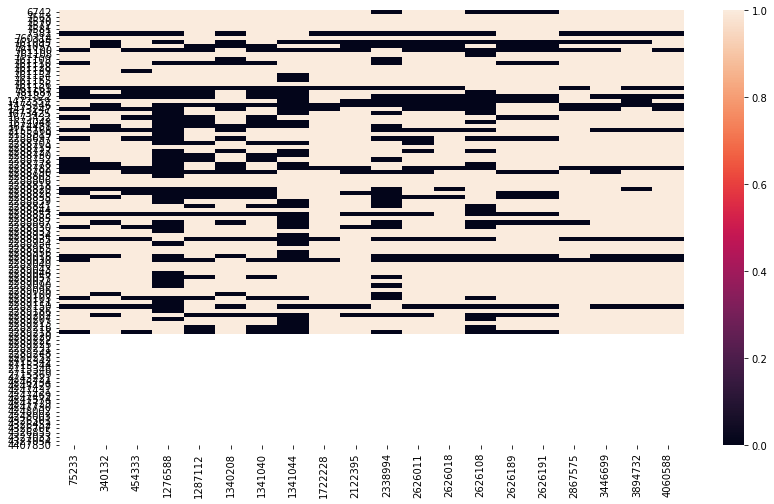

In [15]:
figure = plt.figure(figsize=(14,8))
ax = figure.gca()

sns.heatmap(newmat2, yticklabels = positions_i_new, xticklabels=positions_j_new)

In [17]:
all_snps = pd.read_csv("output/03.annotation/snps_with_gene_annotation.csv")
len(all_snps.query("pos in @positions_j_new"))

20

In [18]:
potentiators = all_snps.query("pos in @positions_j_new")
potentiators.to_csv("output/potentiator_mutations.csv")

In [19]:
potentiators

,Unnamed: 0,pos,ref,alt,gene_id,gene_pos,gene_category,gene_name,is_lineage
201,20051,75233,C,['A'],intergenic,NaN,None,None,False
489,73834,340132,G,['A'],Rv0280,768.0,PE/PPE,PPE3,False
632,95481,454333,T,['G'],Rv0376c,1103.0,Non-Essential,Rv0376c,False
1491,239536,1276588,C,['G'],Rv1148c,288.0,Non-Essential,Rv1148c,False
1512,241057,1287112,T,['C'],intergenic,NaN,None,None,False
1598,250896,1340208,G,['A'],Rv1196,859.0,PE/PPE,PPE18,False
1620,251012,1341040,C,"['A', 'T']",Rv1198,34.0,Antigen,esxL,False
1621,251014,1341044,C,['T'],Rv1198,38.0,Antigen,esxL,False
2011,315778,1722228,A,"['C', 'T', 'G']",Rv1527c,145.0,Non-Essential,pks5,False
2353,384755,2122395,C,['T'],Rv1872c,488.0,Antigen,lldD2,False
